# Time Series Analysis - Anomaly Detection
### Author: Cesar Castro M
### Date: 08/11/2025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [2]:
# Read already prepared dataset
mfg_df = pd.read_csv('..\data\processed\mfg_time_series.csv')
mfg_df.head()

,Machine_ID,Timestamp,Temperature_C,Vibration_Hz,Power_Consumption_kW,Network_Latency_ms,Packet_Loss_%,Quality_Control_Defect_Rate_%,Production_Speed_units_per_hr,Predictive_Maintenance_Score,Error_Rate_%
0,1,2024-01-01 00:00:00,59.027691,3.273465,6.871082,23.445160,2.308684,4.684600,349.632925,0.392129,6.939090
1,1,2024-01-01 12:00:00,63.907350,2.021363,4.978956,30.675345,2.408669,5.366573,321.184645,0.410275,7.534709
2,1,2024-01-02 00:00:00,51.808176,2.047471,6.029171,31.269433,1.834945,6.899124,363.738970,0.522837,6.831884
3,1,2024-01-02 12:00:00,57.371817,2.646207,5.790383,28.433255,3.047640,5.324885,294.783106,0.425722,5.794327
4,1,2024-01-03 00:00:00,56.866279,2.500103,7.077736,29.890366,3.134400,5.549209,302.052996,0.307520,7.169374


In [3]:
# Data Preparation - Setting Correct Columns Types
mfg_df['Machine_ID'] = mfg_df['Machine_ID'].astype('category')
mfg_df.columns = mfg_df.columns.str.replace('%', 'perc').astype(str)
mfg_df['Timestamp'] = pd.to_datetime(mfg_df['Timestamp'])

mfg_df.head()



,Machine_ID,Timestamp,Temperature_C,Vibration_Hz,Power_Consumption_kW,Network_Latency_ms,Packet_Loss_perc,Quality_Control_Defect_Rate_perc,Production_Speed_units_per_hr,Predictive_Maintenance_Score,Error_Rate_perc
0,1,2024-01-01 00:00:00,59.027691,3.273465,6.871082,23.445160,2.308684,4.684600,349.632925,0.392129,6.939090
1,1,2024-01-01 12:00:00,63.907350,2.021363,4.978956,30.675345,2.408669,5.366573,321.184645,0.410275,7.534709
2,1,2024-01-02 00:00:00,51.808176,2.047471,6.029171,31.269433,1.834945,6.899124,363.738970,0.522837,6.831884
3,1,2024-01-02 12:00:00,57.371817,2.646207,5.790383,28.433255,3.047640,5.324885,294.783106,0.425722,5.794327
4,1,2024-01-03 00:00:00,56.866279,2.500103,7.077736,29.890366,3.134400,5.549209,302.052996,0.307520,7.169374


### Outliers report

Temperature_C: 30 outliers </br>
Vibration_Hz: 27 outliers</br>
Power_Consumption_kW: 43 outliers</br>
Network_Latency_ms: 26 outliers</br>
Packet_Loss_%: 28 outliers</br>
Quality_Control_Defect_Rate_%: 39 outliers</br>
Production_Speed_units_per_hr: 31 outliers</br>
Predictive_Maintenance_Score: 33 outliers</br>
Error_Rate_%: 29 outliers</br>

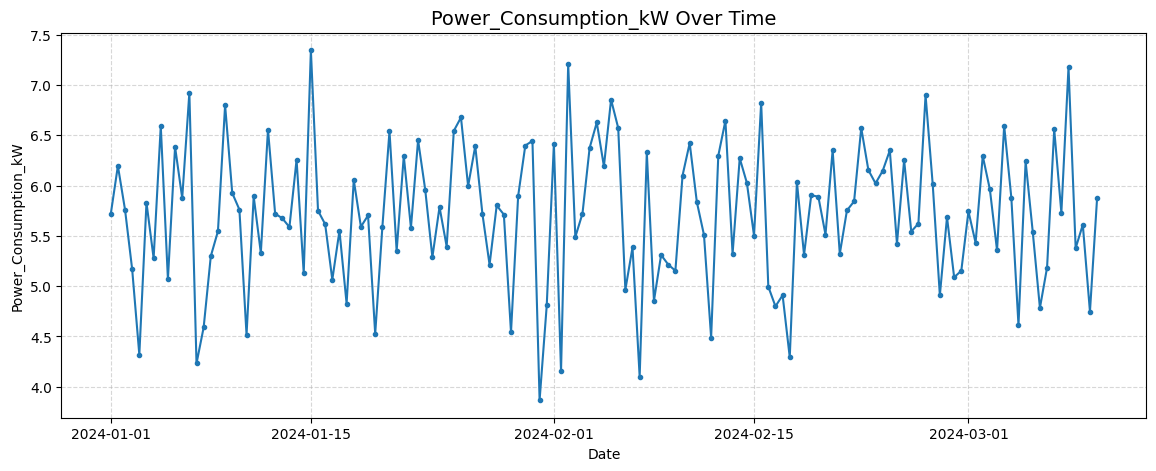

In [4]:
# Plot the Power_Consumption_Kw values for Machine 1

plt_df = mfg_df[mfg_df['Machine_ID']==4]
plt.figure(figsize=(14, 5))
plt.plot(plt_df["Timestamp"], plt_df["Power_Consumption_kW"], marker="o", markersize=3, linestyle="-")

plt.title("Power_Consumption_kW Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Power_Consumption_kW")
plt.grid(True, linestyle="--", alpha=0.5)

In [5]:
# Filter Machine 1 for Next Steps and define timestamp column as time
ts_df = mfg_df.copy()
ts_df = ts_df[ts_df['Machine_ID']==1]

ts_df['Timestamp'] = pd.to_datetime(ts_df['Timestamp'])
ts_df.set_index('Timestamp', inplace = True)
ts_df.head()


,Machine_ID,Temperature_C,Vibration_Hz,Power_Consumption_kW,Network_Latency_ms,Packet_Loss_perc,Quality_Control_Defect_Rate_perc,Production_Speed_units_per_hr,Predictive_Maintenance_Score,Error_Rate_perc
Timestamp,,,,,,,,,,
2024-01-01 00:00:00,1,59.027691,3.273465,6.871082,23.445160,2.308684,4.684600,349.632925,0.392129,6.939090
2024-01-01 12:00:00,1,63.907350,2.021363,4.978956,30.675345,2.408669,5.366573,321.184645,0.410275,7.534709
2024-01-02 00:00:00,1,51.808176,2.047471,6.029171,31.269433,1.834945,6.899124,363.738970,0.522837,6.831884
2024-01-02 12:00:00,1,57.371817,2.646207,5.790383,28.433255,3.047640,5.324885,294.783106,0.425722,5.794327
2024-01-03 00:00:00,1,56.866279,2.500103,7.077736,29.890366,3.134400,5.549209,302.052996,0.307520,7.169374


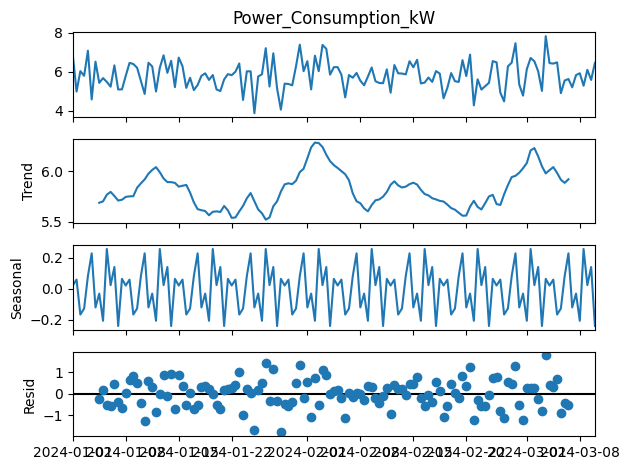

In [6]:
#https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(ts_df['Power_Consumption_kW'], model = 'additive',period=14)

# Plot the decomposed components
decomposition.plot()
plt.tight_layout()
plt.show()

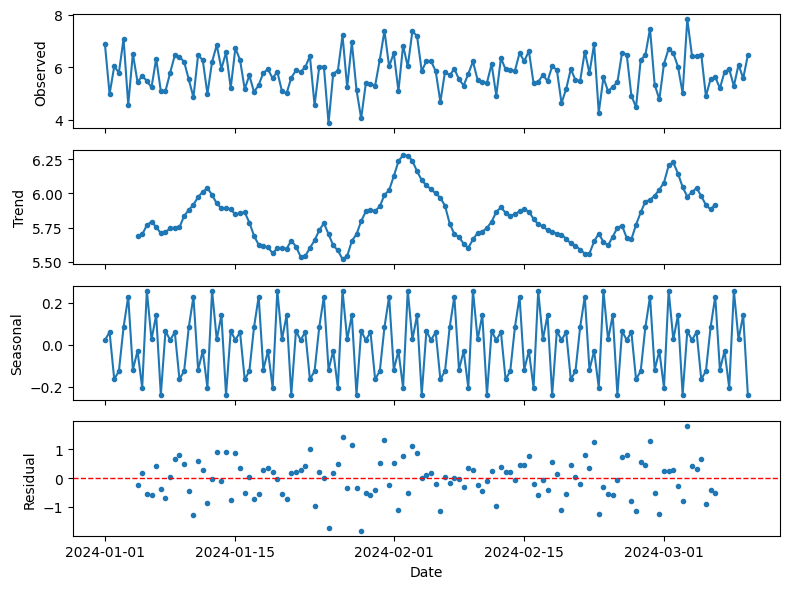

In [7]:
# Improved Chart, getting all data individully to improve visualization from standard charts.
fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)

axes[0].plot(decomposition.observed, marker="o", markersize=3, linestyle="-")
axes[0].set_ylabel('Observed')

axes[1].plot(decomposition.trend, marker="o", markersize=3, linestyle="-")
axes[1].set_ylabel('Trend')

axes[2].plot(decomposition.seasonal, marker="o", markersize=3, linestyle="-")
axes[2].set_ylabel('Seasonal')

axes[3].plot(decomposition.resid, marker="o", markersize=3, linestyle="")
axes[3].axhline(0, color='red', linestyle='--', linewidth=1)  
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Date')

plt.tight_layout()
plt.show()


In [17]:
# Anomalies in residuals
residuals = decomposition.resid.dropna()
threshold = 2 * residuals.std()
anomalies = np.abs(residuals) > threshold # Results
anomalies.sum()

4

In [9]:
# Source: https://datamineaz.org/exercises/ex-09.html
# Test to check if time Series is Stationary (stays constant over time)
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(ts_df['Power_Consumption_kW'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Interpretation
if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

ADF Statistic: -11.694420
p-value: 0.000000
Series is stationary


What are p, d, and q?

p = order of the AutoRegressive (AR) part (how many past values algo will use)

d = degree of differencing (how many times you subtract previous values to make series stationary)

q = order of the Moving Average (MA) part (how many past errors you include)

In [10]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
arima_model = ARIMA(ts_df['Power_Consumption_kW'], order=(1,1,1)) # Randomly selected 1,1,1 for P,D,Q - will use auto-ARIMA
fitted_model = arima_model.fit()

# Get residuals
residuals = fitted_model.resid
threshold = 2.5 * residuals.std()
anomalies = np.abs(residuals) > threshold
anomalies.sum()

c:\Users\cesar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 12h will be used.
  self._init_dates(dates, freq)
c:\Users\cesar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 12h will be used.
  self._init_dates(dates, freq)
c:\Users\cesar\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 12h will be used.
  self._init_dates(dates, freq)


1

In [11]:
#Fitting auto-arima model
from pmdarima import auto_arima
auto_model = auto_arima(ts_df['Power_Consumption_kW'], 
                        seasonal=False,
 
                        error_action = 'ignore',  
                        suppress_warnings = True, 
                        stepwise = True)
print(auto_model.summary())
print(f"Best (p, d, q): ({auto_model.order[0]}, {auto_model.order[1]}, {auto_model.order[2]})")



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  139
Model:                        SARIMAX   Log Likelihood                -149.194
Date:                Thu, 14 Aug 2025   AIC                            302.388
Time:                        17:11:23   BIC                            308.257
Sample:                    01-01-2024   HQIC                           304.773
                         - 03-10-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.8176      0.060     96.802      0.000       5.700       5.935
sigma2         0.5010      0.059      8.537      0.000       0.386       0.616
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [12]:
#Find the Anomalies based on the difference between predicted and observed.

fitted_values = auto_model.predict_in_sample()
#fitted_values = auto_model.predict()
residuals = ts_df['Power_Consumption_kW'] - fitted_values
threshold = 2 * residuals.std()
anomalies = np.abs(residuals) > threshold
ts_df['Power_Consumption_kW_anomalies'] =anomalies


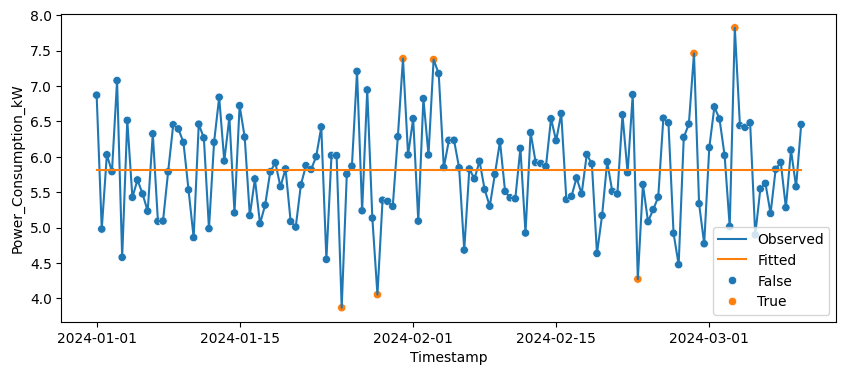

In [13]:
# Plot the Power_Consumption_Kw values for Machine 1
# Highlight points identfied by the rule of 2X std dev.

plt_df = ts_df.copy()
plt.figure(figsize=(10, 4))
plt.plot(ts_df['Power_Consumption_kW'], label='Observed')
plt.plot(fitted_values, label='Fitted')
sns.scatterplot(ts_df,x=ts_df.index,y=ts_df['Power_Consumption_kW'],hue=ts_df['Power_Consumption_kW_anomalies'])
plt.legend()
plt.show()

In [14]:
# This was an attempt to use LSTM, however, not used for final report as understand of the algo is not clear to me.
# Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
ts_scaled = scaler.fit_transform(ts_df['Power_Consumption_kW'].to_numpy().reshape(-1, 1))

# Create sequences
# Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
#The function takes two arguments: the dataset, which is a NumPy array you want to convert into a dataset, 
# and the look_back, which is the number of previous time steps to use as input variables to predict the next time period—in this case, defaulted to 1.
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(ts_scaled, seq_length)

# Reshape X to be [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X, y, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2274
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1872 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1501 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1145 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0798 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0491 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0333 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0411 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0359 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0335 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0332 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0332 
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0332 
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0341 
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0355 
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


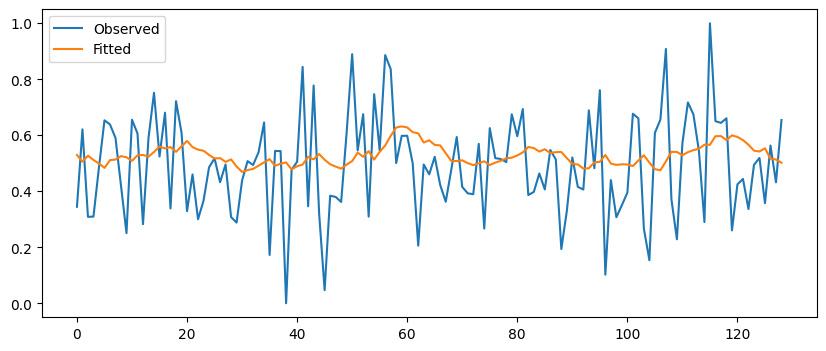

In [15]:
# Create similar chart as with ARIMA model. 
y_pred = model.predict(X)
# Plot the Power_Consumption_Kw values for Machine 1

plt_df = ts_df.copy()
plt.figure(figsize=(10, 4))
plt.plot(y, label='Observed')
plt.plot(y_pred, label='Fitted')
plt.legend()
plt.show()